In [2]:
install.packages("corrplot", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [219]:
install.packages("Hmisc", repos='http://cran.us.r-project.org')

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘survival’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
data<-read.csv('Data_Projects.csv', sep=";", dec=",")

In [49]:
describe(data)

data 

 9  Variables      79  Observations
--------------------------------------------------------------------------------
AddressCount 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      79        0       77        1     1048     1431     26.1     47.4 
     .25      .50      .75      .90      .95 
    81.0    371.0   1195.0   3082.4   4129.3 

lowest :    9   14   17   18   27, highest: 4121 4204 5740 6037 9552
--------------------------------------------------------------------------------
CallsCount 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      79        0       79        1     3649     5412     88.0    152.4 
     .25      .50      .75      .90      .95 
   346.0    931.0   2457.5   8809.4  12472.9 

lowest :    20    37    56    70    90, highest: 12436 12805 20609 47912 48497
--------------------------------------------------------------------------------
ClicksCount 
       n  missing distinct     Info     Mean     

In [2]:
summary(data)

  AddressCount    CallsCount     ClicksCount       FirmsCount    
 Min.   :   9   Min.   :   20   Min.   :   258   Min.   :  14.0  
 1st Qu.:  81   1st Qu.:  346   1st Qu.:  2055   1st Qu.:  71.5  
 Median : 371   Median :  931   Median :  6921   Median : 185.0  
 Mean   :1048   Mean   : 3649   Mean   : 21826   Mean   : 305.1  
 3rd Qu.:1195   3rd Qu.: 2458   3rd Qu.: 30626   3rd Qu.: 402.5  
 Max.   :9552   Max.   :48497   Max.   :167155   Max.   :2379.0  
    GeoPart          MobilePart       UsersCount       Distance     
 Min.   :0.09292   Min.   :0.0900   Min.   :  157   Min.   : 714.8  
 1st Qu.:0.28153   1st Qu.:0.3573   1st Qu.: 1168   1st Qu.:1562.1  
 Median :0.32234   Median :0.4637   Median : 2934   Median :2586.5  
 Mean   :0.34264   Mean   :0.4457   Mean   : 9753   Mean   :2669.4  
 3rd Qu.:0.41691   3rd Qu.:0.5517   3rd Qu.:13265   3rd Qu.:3575.7  
 Max.   :0.55618   Max.   :0.7373   Max.   :61127   Max.   :6292.2  
     IsGeo       
 Min.   :0.0000  
 1st Qu.:0.0000  
 

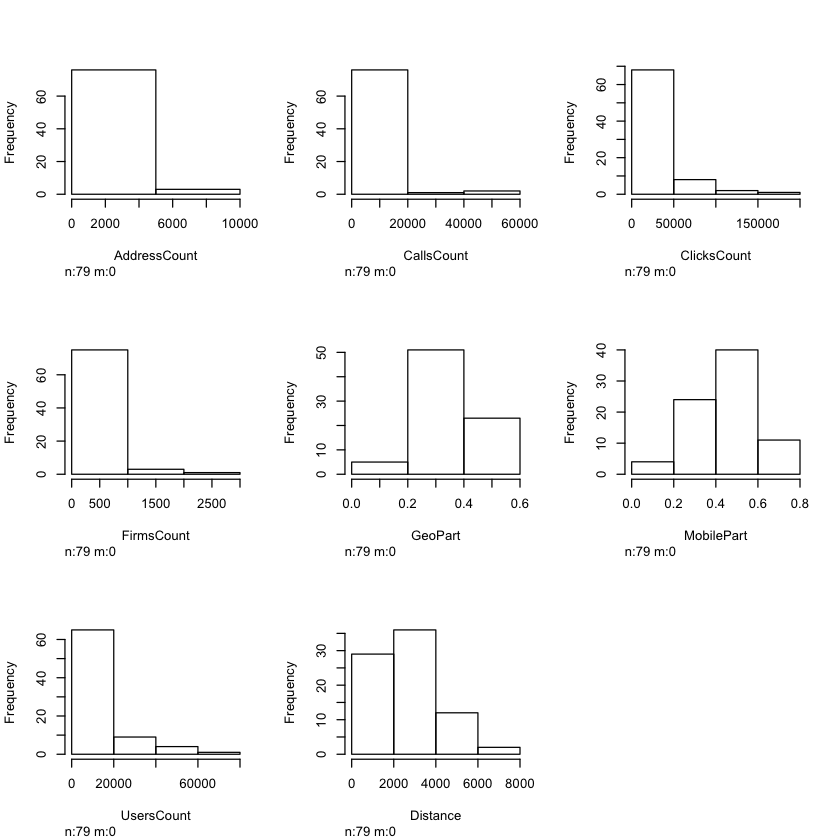

In [6]:
library(Hmisc)
hist.data.frame(data)

# Регрессия 1

В качестве анализируемого признака будетм использовать ClicksCount


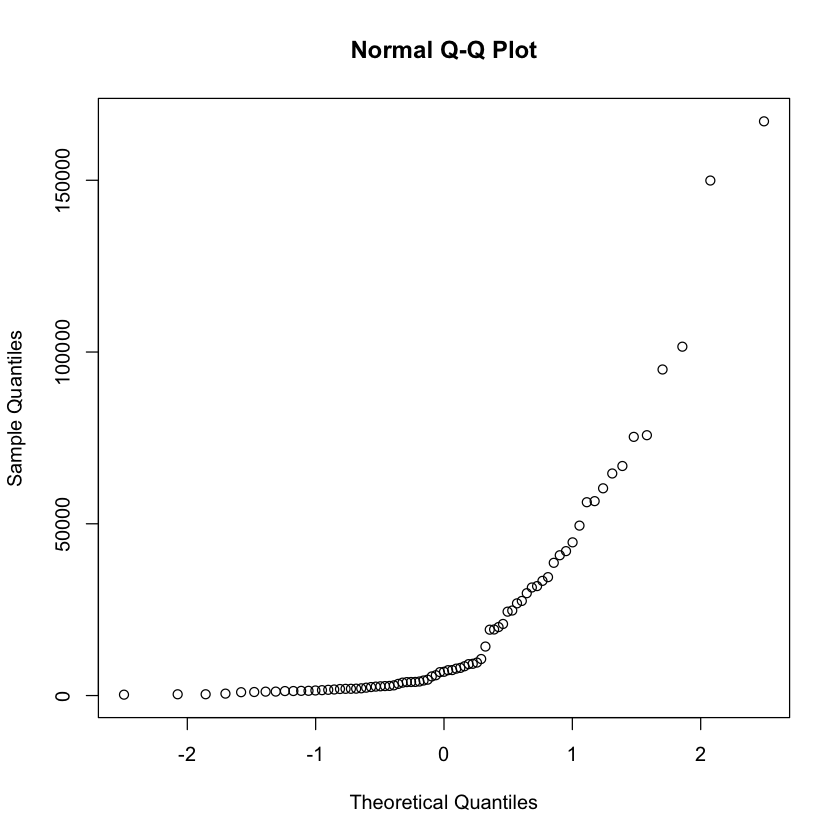

In [52]:
qqnorm(data$ClicksCount)

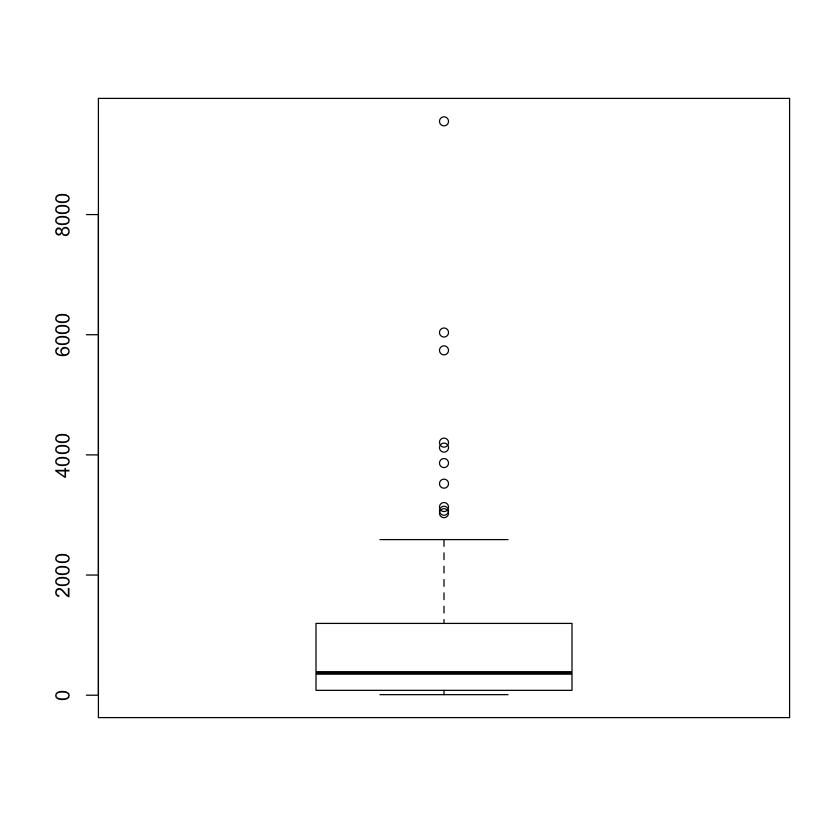

In [8]:
boxplot(data$AddressCount)

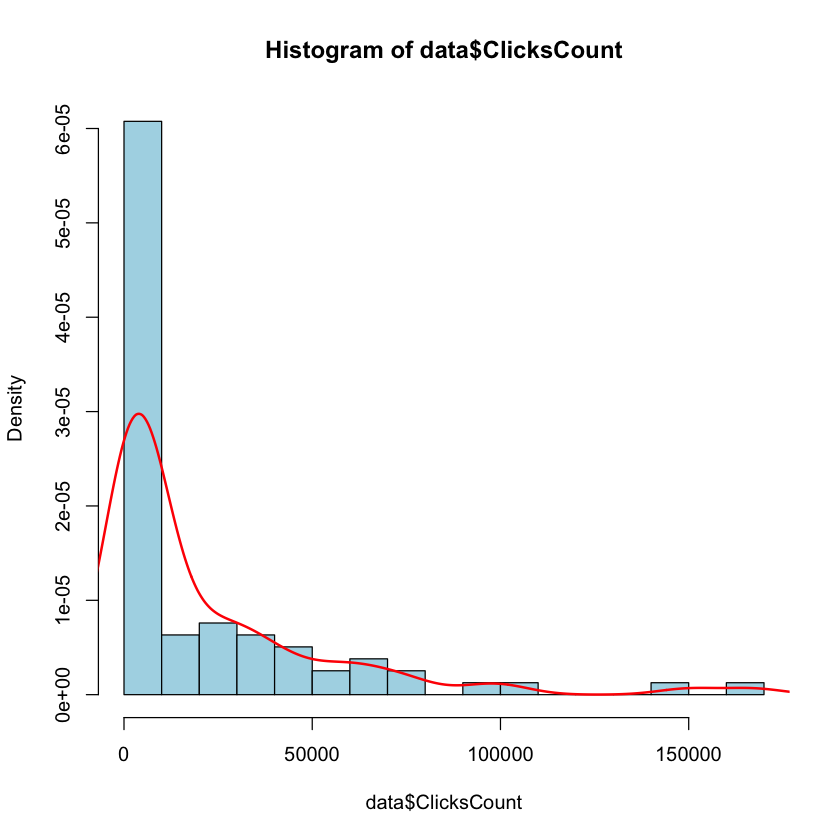

In [53]:
hist(data$ClicksCount, breaks = "FD", freq = FALSE, col = "lightblue")
lines(density(data$ClicksCount), col = "red", lwd = 2)

In [11]:
library('nortest')

In [54]:
ad.test(data$ClicksCount)
cvm.test(data$ClicksCount)
lillie.test(data$ClicksCount)
pearson.test(data$ClicksCount)
shapiro.test(data$ClicksCount)
sf.test(data$ClicksCount)


	Anderson-Darling normality test

data:  data$ClicksCount
A = 8.3609, p-value < 2.2e-16


Warning message in cvm.test(data$ClicksCount):
“p-value is smaller than 7.37e-10, cannot be computed more accurately”


	Cramer-von Mises normality test

data:  data$ClicksCount
W = 1.5636, p-value = 7.37e-10



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data$ClicksCount
D = 0.25502, p-value = 6.401e-14



	Pearson chi-square normality test

data:  data$ClicksCount
P = 229.81, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  data$ClicksCount
W = 0.67707, p-value = 6.813e-12



	Shapiro-Francia normality test

data:  data$ClicksCount
W = 0.67177, p-value = 2.233e-10


Вывод: гипотеза о нормальности переменной ClicksCount отвергается, имеюются выбросы

### Первое преобразование данных

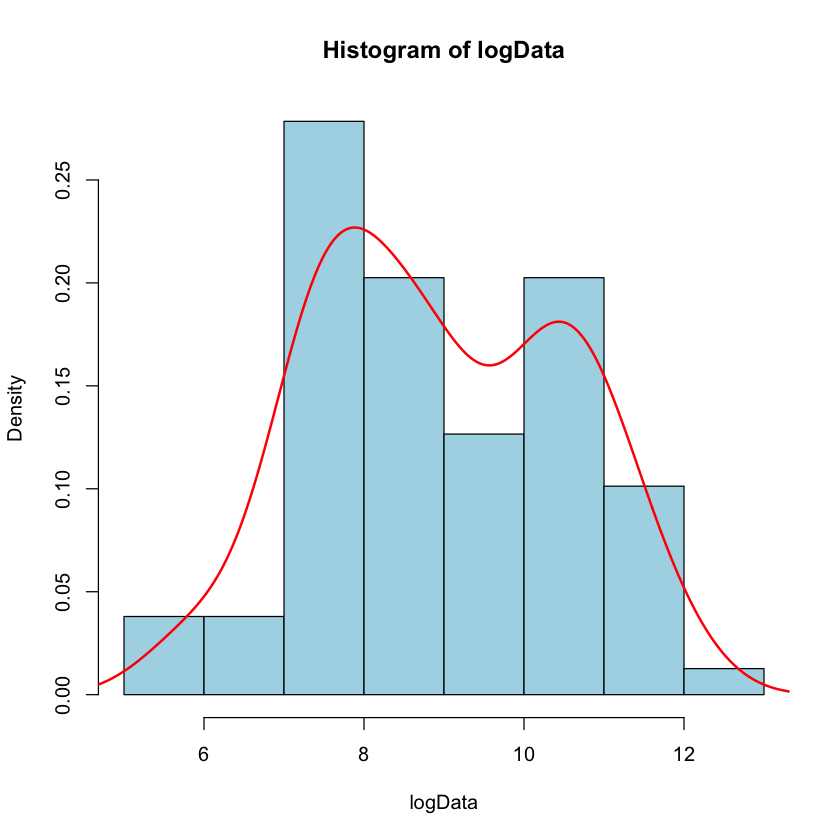

In [55]:
logData <-log(data$ClicksCount)
hist(logData, breaks = "FD", freq = FALSE, col = "lightblue")
lines(density(logData), col = "red", lwd = 2)

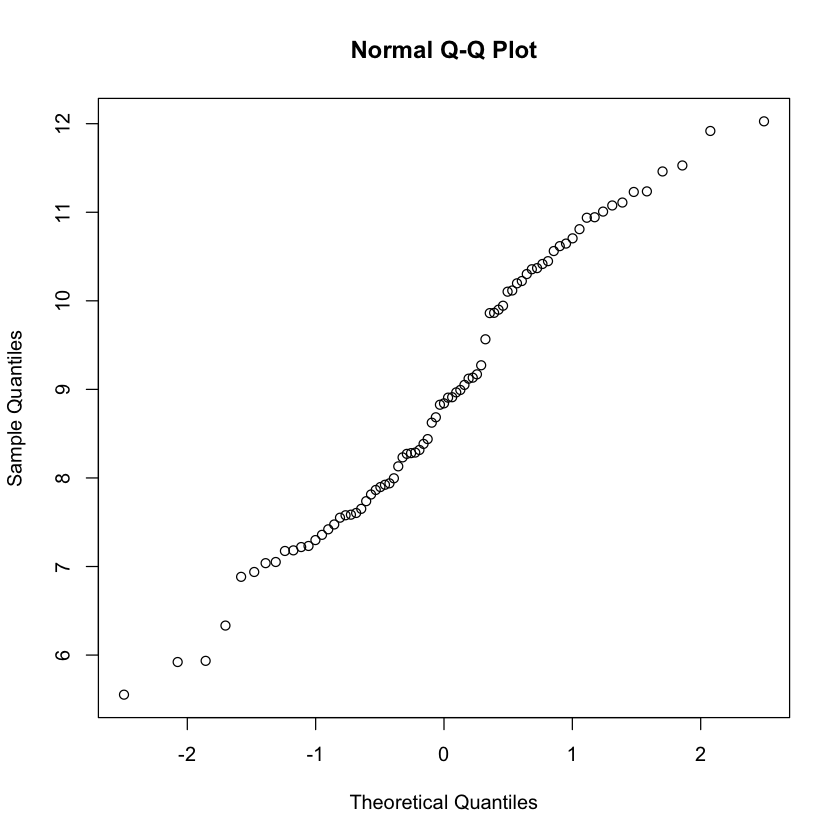

In [56]:
qqnorm(logData)

In [57]:
ad.test(logData)
cvm.test(logData)
lillie.test(logData)
pearson.test(logData)
shapiro.test(logData)
sf.test(logData)


	Anderson-Darling normality test

data:  logData
A = 0.86722, p-value = 0.02493



	Cramer-von Mises normality test

data:  logData
W = 0.15102, p-value = 0.02245



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  logData
D = 0.090076, p-value = 0.1172



	Pearson chi-square normality test

data:  logData
P = 10.772, p-value = 0.2917



	Shapiro-Wilk normality test

data:  logData
W = 0.97013, p-value = 0.06063



	Shapiro-Francia normality test

data:  logData
W = 0.97538, p-value = 0.116


Вывод:Согласно критерию Шапиро-Уилка гипотеза H0 о том, что различия между распеределением этой выборки и нормальным расперделенеим отсутвует должна быть принята
(так как p-value > α),

In [58]:
data2<-cbind(data,logData)
summary(data2)

  AddressCount    CallsCount     ClicksCount       FirmsCount    
 Min.   :   9   Min.   :   20   Min.   :   258   Min.   :  14.0  
 1st Qu.:  81   1st Qu.:  346   1st Qu.:  2055   1st Qu.:  71.5  
 Median : 371   Median :  931   Median :  6921   Median : 185.0  
 Mean   :1048   Mean   : 3649   Mean   : 21826   Mean   : 305.1  
 3rd Qu.:1195   3rd Qu.: 2458   3rd Qu.: 30626   3rd Qu.: 402.5  
 Max.   :9552   Max.   :48497   Max.   :167155   Max.   :2379.0  
    GeoPart          MobilePart       UsersCount       Distance     
 Min.   :0.09292   Min.   :0.0900   Min.   :  157   Min.   : 714.8  
 1st Qu.:0.28153   1st Qu.:0.3573   1st Qu.: 1168   1st Qu.:1562.1  
 Median :0.32234   Median :0.4637   Median : 2934   Median :2586.5  
 Mean   :0.34264   Mean   :0.4457   Mean   : 9753   Mean   :2669.4  
 3rd Qu.:0.41691   3rd Qu.:0.5517   3rd Qu.:13265   3rd Qu.:3575.7  
 Max.   :0.55618   Max.   :0.7373   Max.   :61127   Max.   :6292.2  
     IsGeo           logData      
 Min.   :0.0000   Mi

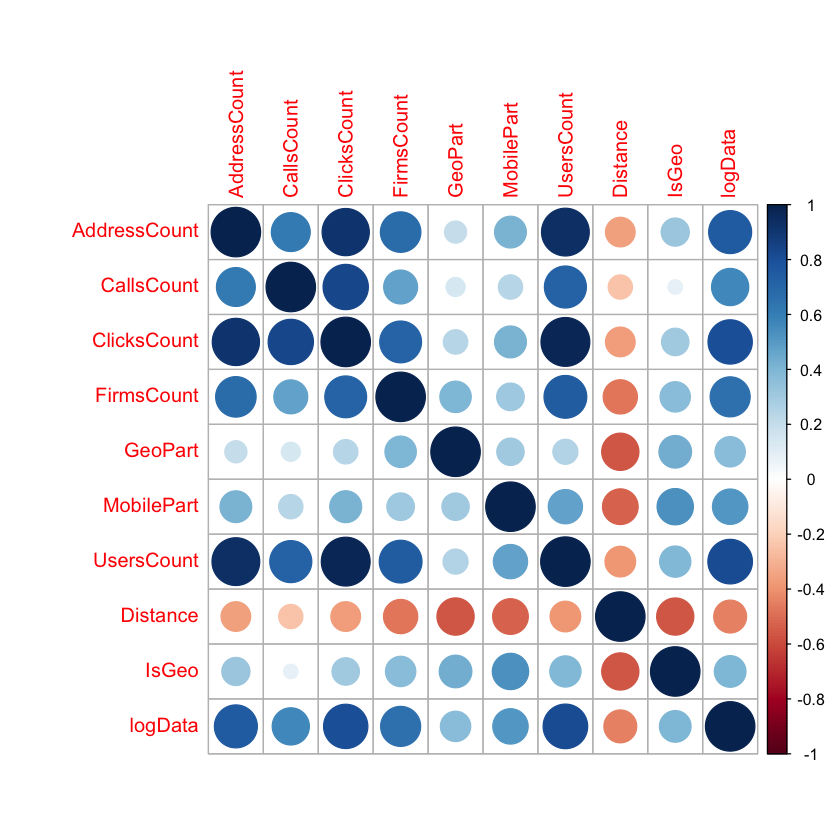

In [59]:
library('corrplot') #package corrplot
M <- cor(data2) 
corrplot(M, method = "circle") #plot matrix

Построим регрессию для переменных, которые имеют наиболее значимых корреляцию с объеясняемой переменной

In [60]:
regression <- lm(logData~AddressCount+CallsCount+FirmsCount+UsersCount+Distance, data=data2)
summary(regression)


Call:
lm(formula = logData ~ AddressCount + CallsCount + FirmsCount + 
    UsersCount + Distance, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5972 -0.5564  0.1384  0.6383  1.7355 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.493e+00  2.990e-01  28.405  < 2e-16 ***
AddressCount -3.324e-05  1.830e-04  -0.182  0.85636    
CallsCount   -6.244e-06  1.929e-05  -0.324  0.74712    
FirmsCount    1.567e-04  4.410e-04   0.355  0.72334    
UsersCount    8.877e-05  2.758e-05   3.218  0.00192 ** 
Distance     -1.570e-04  8.300e-05  -1.892  0.06252 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9171 on 73 degrees of freedom
Multiple R-squared:  0.6822,	Adjusted R-squared:  0.6604 
F-statistic: 31.34 on 5 and 73 DF,  p-value: < 2.2e-16


Изменим спецификацию модели

In [67]:
regression <- lm(logData~UsersCount+Distance, data=data2)
summary(regression)


Call:
lm(formula = logData ~ UsersCount + Distance, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6228 -0.5588  0.1343  0.6543  1.7949 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.547e+00  2.668e-01  32.039   <2e-16 ***
UsersCount   8.527e-05  7.931e-06  10.752   <2e-16 ***
Distance    -1.679e-04  7.736e-05  -2.171   0.0331 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9007 on 76 degrees of freedom
Multiple R-squared:  0.6808,	Adjusted R-squared:  0.6725 
F-statistic: 81.07 on 2 and 76 DF,  p-value: < 2.2e-16


 Вывод: скореектированный R^2 = 0.6567 

### Проверим мультиколениарность между переменными

In [68]:
cor(data2$UsersCount,data2$Distance, method = "pearson")
cor(data2$UsersCount,data2$Distance, method = "kendal")
cor(data2$UsersCount,data2$Distance, method = "spearman")

[1] -0.3839582

[1] -0.3242454

[1] -0.4797955

Мультиколлениарность между регрессорами отсутствует

Рассмотрим гистограмму для остатков модели

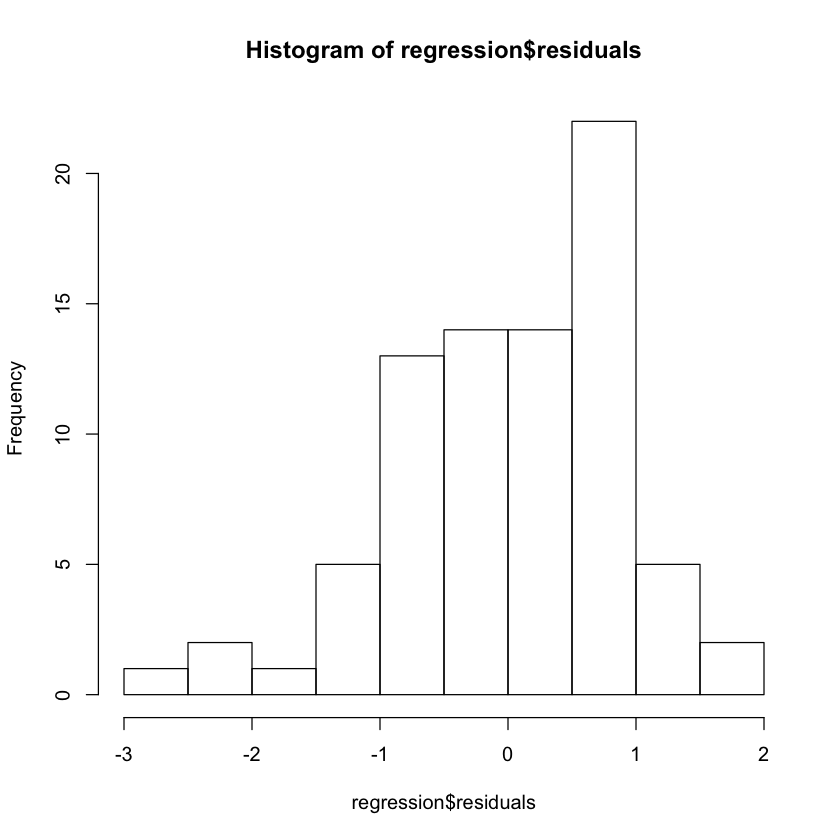

In [69]:
hist(regression$residuals, breaks = "FD")

In [70]:
wilcox.test(regression$residuals)


	Wilcoxon signed rank test with continuity correction

data:  regression$residuals
V = 1688, p-value = 0.5993
alternative hypothesis: true location is not equal to 0


In [73]:
shapiro.test(regression$residuals)
ad.test(regression$residuals)
cvm.test(regression$residuals)
lillie.test(regression$residuals)


	Shapiro-Wilk normality test

data:  regression$residuals
W = 0.97242, p-value = 0.08461



	Anderson-Darling normality test

data:  regression$residuals
A = 0.64752, p-value = 0.08791



	Cramer-von Mises normality test

data:  regression$residuals
W = 0.10282, p-value = 0.1008



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  regression$residuals
D = 0.088588, p-value = 0.131


In [28]:
library(car)

Loading required package: carData


In [72]:
car::durbinWatsonTest(regression)

 lag Autocorrelation D-W Statistic p-value
   1       0.5399285     0.8709212       0
 Alternative hypothesis: rho != 0

Вывод: остатки модели  имею нормльного распределния. Значение коэффициента дитерминации  высокий. 
Отсутвует мультиколинеарность между регрессорами

# Регрессия 2

Рассмотрим второй вариант регрессии, для логарифмированных переменных, переменная IsGeo, принимающая дихатомические значения, не логарифмируетсч

In [32]:
newData<-data.frame(AddressCount=log(data$AddressCount), CallsCount=log(data$CallsCount),ClicksCount=log(data$ClicksCount), FirmsCount=log(data$FirmsCount), GeoPart=log(data$GeoPart),MobilePart=log(data$MobilePart),Distance=log(data$Distance),IsGeo=data$IsGeo)

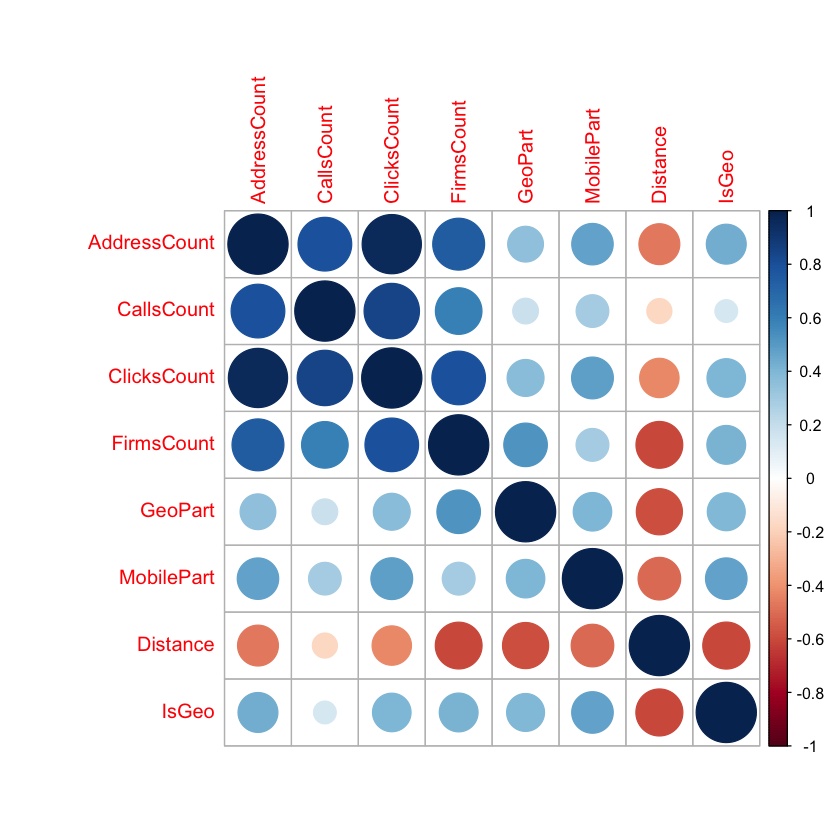

In [33]:
library('corrplot') #package corrplot
M <- cor(newData) 
corrplot(M, method = "circle") #plot matrix

In [74]:
regressin4 <- lm(ClicksCount~CallsCount+AddressCount+FirmsCount+GeoPart+MobilePart+Distance+IsGeo, data= newData)
summary(regressin4)


Call:
lm(formula = ClicksCount ~ CallsCount + AddressCount + FirmsCount + 
    GeoPart + MobilePart + Distance + IsGeo, data = newData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17031 -0.13455  0.01282  0.14161  0.82090 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.80649    0.75009   1.075  0.28593    
CallsCount    0.18311    0.03730   4.909 5.64e-06 ***
AddressCount  0.61199    0.04371  14.002  < 2e-16 ***
FirmsCount    0.29551    0.05088   5.808 1.64e-07 ***
GeoPart       0.05766    0.12654   0.456  0.65002    
MobilePart    0.35323    0.10477   3.372  0.00121 ** 
Distance      0.27513    0.09029   3.047  0.00324 ** 
IsGeo         0.07405    0.09050   0.818  0.41593    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2831 on 71 degrees of freedom
Multiple R-squared:  0.9706,	Adjusted R-squared:  0.9676 
F-statistic: 334.3 on 7 and 71 DF,  p-value: < 2.2e-16


In [82]:
regressin4 <- lm(ClicksCount~CallsCount+AddressCount+FirmsCount, data= newData)
summary(regressin4)


Call:
lm(formula = ClicksCount ~ CallsCount + AddressCount + FirmsCount, 
    data = newData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46325 -0.13976  0.00337  0.13750  0.73334 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.64291    0.17734  14.903  < 2e-16 ***
CallsCount    0.20135    0.03575   5.632 2.94e-07 ***
AddressCount  0.64990    0.04142  15.691  < 2e-16 ***
FirmsCount    0.21624    0.04391   4.925 4.90e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.307 on 75 degrees of freedom
Multiple R-squared:  0.9634,	Adjusted R-squared:  0.9619 
F-statistic: 658.3 on 3 and 75 DF,  p-value: < 2.2e-16


Проверка мультиколлениарности

In [83]:
cor(data2$CallsCount,data2$AddressCount, method = "pearson")
cor(data2$CallsCount,data2$AddressCount, method = "kendal")
cor(data2$CallsCount,data2$AddressCount, method = "spearman")

[1] 0.6180091

[1] 0.6496754

[1] 0.821882

In [84]:
cor(data2$CallsCount,data2$FirmsCount, method = "pearson")
cor(data2$CallsCount,data2$FirmsCount, method = "kendal")
cor(data2$CallsCount,data2$FirmsCount, method = "spearman")

[1] 0.4704562

[1] 0.4552688

[1] 0.6349434

In [85]:
cor(data2$FirmsCount,data2$AddressCount, method = "pearson")
cor(data2$FirmsCount,data2$AddressCount, method = "kendal")
cor(data2$FirmsCount,data2$AddressCount, method = "spearman")

[1] 0.6701677

[1] 0.554166

[1] 0.7461279

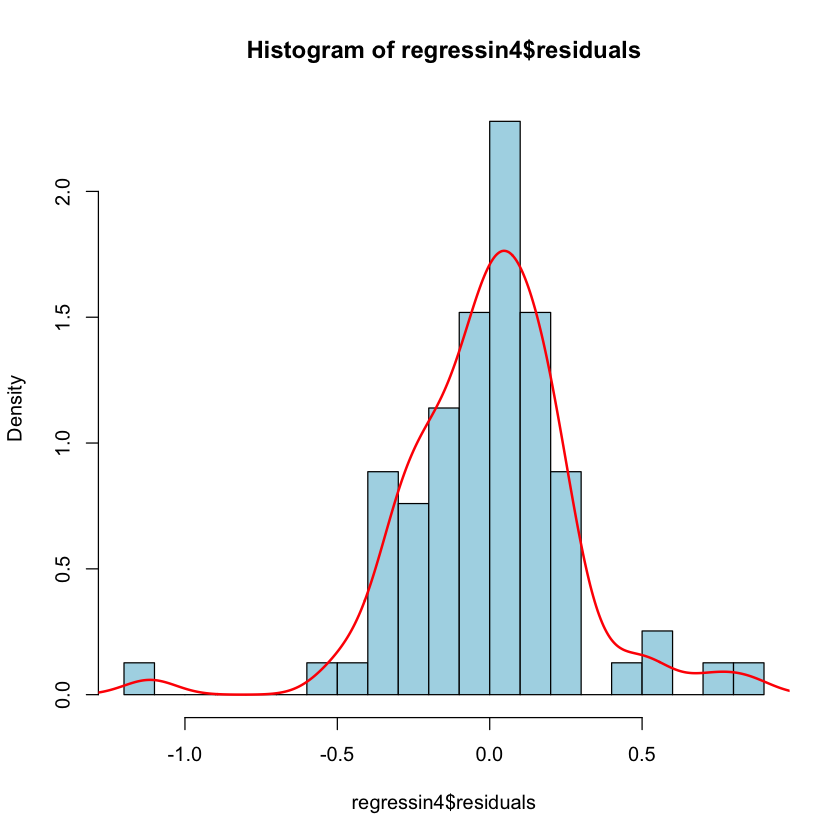

In [76]:
hist(regressin4$residuals, breaks = "FD", freq = FALSE, col = "lightblue")
lines(density(regressin4$residuals), col = "red", lwd = 2)

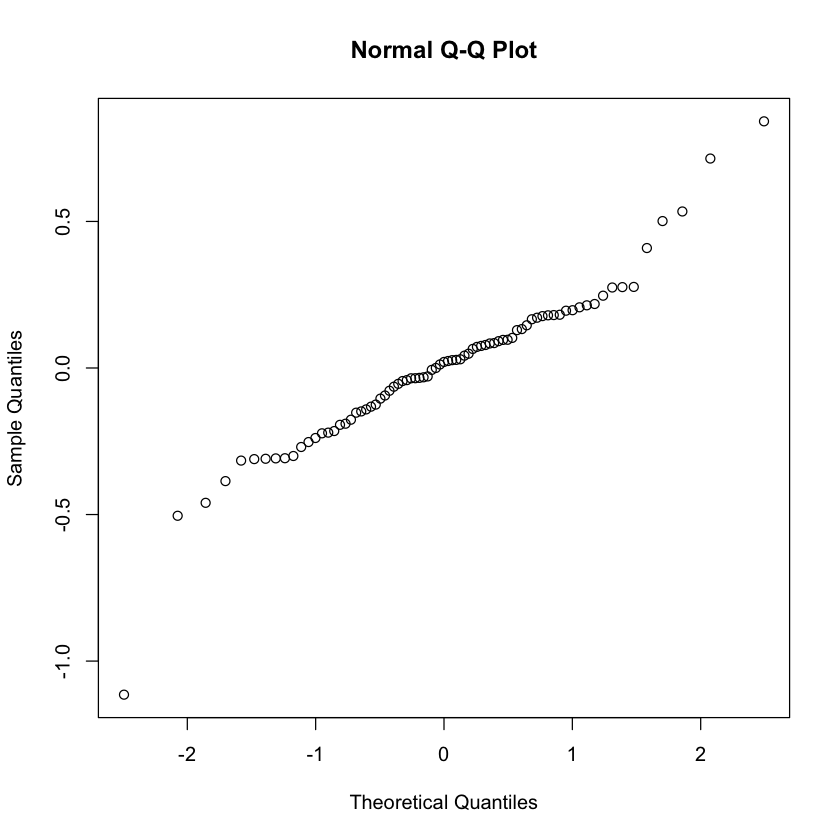

In [77]:
qqnorm(regressin4$residuals)

In [78]:
ad.test(regressin4$residuals)
cvm.test(regressin4$residuals)
lillie.test(regressin4$residuals)
pearson.test(regressin4$residuals)
shapiro.test(regressin4$residuals)
sf.test(regressin4$residuals)


	Anderson-Darling normality test

data:  regressin4$residuals
A = 0.9809, p-value = 0.013



	Cramer-von Mises normality test

data:  regressin4$residuals
W = 0.13434, p-value = 0.03749



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  regressin4$residuals
D = 0.096915, p-value = 0.0638



	Pearson chi-square normality test

data:  regressin4$residuals
P = 8.9494, p-value = 0.442



	Shapiro-Wilk normality test

data:  regressin4$residuals
W = 0.94012, p-value = 0.001062



	Shapiro-Francia normality test

data:  regressin4$residuals
W = 0.92706, p-value = 0.0004678


In [79]:
car::durbinWatsonTest(regressin4)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2204753      2.439544   0.072
 Alternative hypothesis: rho != 0

Для того, чтобы спрогнозировать значения исследуемой, посмотрим описательные статистики переменных включенных в модель

In [80]:
summary(newData)

  AddressCount     CallsCount      ClicksCount       FirmsCount   
 Min.   :2.197   Min.   : 2.996   Min.   : 5.553   Min.   :2.639  
 1st Qu.:4.394   1st Qu.: 5.846   1st Qu.: 7.628   1st Qu.:4.264  
 Median :5.916   Median : 6.836   Median : 8.842   Median :5.220  
 Mean   :5.823   Mean   : 6.952   Mean   : 8.930   Mean   :5.101  
 3rd Qu.:7.086   3rd Qu.: 7.807   3rd Qu.:10.329   3rd Qu.:5.998  
 Max.   :9.165   Max.   :10.789   Max.   :12.027   Max.   :7.774  
    GeoPart          MobilePart         Distance         IsGeo       
 Min.   :-2.3761   Min.   :-2.4079   Min.   :6.572   Min.   :0.0000  
 1st Qu.:-1.2675   1st Qu.:-1.0292   1st Qu.:7.354   1st Qu.:0.0000  
 Median :-1.1321   Median :-0.7684   Median :7.858   Median :0.0000  
 Mean   :-1.1215   Mean   :-0.8772   Mean   :7.734   Mean   :0.3544  
 3rd Qu.:-0.8749   3rd Qu.:-0.5948   3rd Qu.:8.182   3rd Qu.:1.0000  
 Max.   :-0.5867   Max.   :-0.3048   Max.   :8.747   Max.   :1.0000  

In [87]:
newData2<-data.frame(CallsCount=c(2,9,5),AddressCount=c(1,8,7), FirmsCount=c(7,8,11))

In [88]:
predict(regressin4, newData2)

1         2         3 
 5.209223 11.384194 10.577632

In [89]:
predict(regressin4, newData2, se.fit = TRUE, interval="confidence")

fit,lwr,upr
5.209223,4.755072,5.663375
11.384194,11.192112,11.576277
10.577632,10.062620,11.092645


In [90]:
predict(regressin4, newData2, se.fit = TRUE, interval="prediction")

fit,lwr,upr
5.209223,4.447473,5.970973
11.384194,10.743175,12.025213
10.577632,9.778103,11.377162


Вывод: остки модели относительно 0 расположены симметрично, тест Лилиефорса говорит о нормальности распердления остатков модели, коэффиицент дитерминации высокий, автокореляции остатков отсутсвует. 
Полученная модель моделирует 96,76% вариативности паказателя ClicksCount